### Import dos Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import numpy as np

### Import dos Dados

In [2]:
df = pd.read_csv('circulos.csv',usecols=[1,2])

In [3]:
# formato dos dados
df.shape

(1500, 2)

In [4]:
# exibindo primeiras 5 linhas
df.head()

,X,Y
0,-0.262199,0.456958
1,-0.955271,-0.377646
2,0.119759,1.004204
3,-0.817525,-0.636813
4,0.341931,0.408966


In [5]:
# verificando se há dados faltantes
df.isna().sum()

X    0
Y    0
dtype: int64

- O df tem 1500 registros, com 2 colunas úteis
- Não há dados faltantes

### Normalizando os dados

In [6]:
# instanciando o objeto
scaler = MinMaxScaler()

In [7]:
# aplicando a transformação e salvando em outro df
df_norm = scaler.fit_transform(df[['X','Y']])

# voltando para um dataframe
df_norm = pd.DataFrame(df_norm, columns=['X', 'Y'])

# exibindo as 5 primeiras linhas
df_norm.head()

,X,Y
0,0.383914,0.712327
1,0.072309,0.327370
2,0.555643,0.964741
3,0.134239,0.207830
4,0.655531,0.690191


### Visualizando os Dados

Text(0.5, 1.0, 'Plot dos Pontos X e Y')

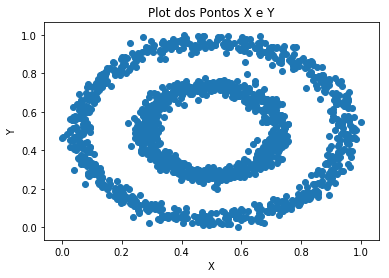

In [8]:
plt.scatter(df_norm['X'], df_norm['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot dos Pontos X e Y')

A distribuição dos dados sugere que o método DBScan, baseado em densidade, funcionará melhor que o KMeans para este caso. Vamos fazer as duas plotagens e compará-las.
A análise visual indica que 2 clusters seria o ideal para este caso.

### Clusterizando com o KMeans

In [9]:
# aux var para entender qtd ideal de clusters
scores = []

# for para testar qtd ideal de clusters
for i in tqdm(range(2,16)):
    kmeans = KMeans(n_clusters=i).fit(df_norm)
       
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df_norm.values, kmeans.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  4.37it/s]


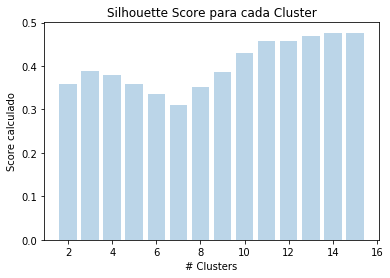

In [10]:
# Visualizando qtd de Clusters pelo K-Means

plt.figure(1)
plt.bar(range(2,16), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para cada Cluster')
plt.xlabel('# Clusters')
plt.ylabel('Score calculado')
plt.show()

O método do KMeans chegou em um silhouette score um pouco abaixo de 0.5, com 14 clusters.

Text(0.5, 1.0, 'Clusterização pelo KMeans')

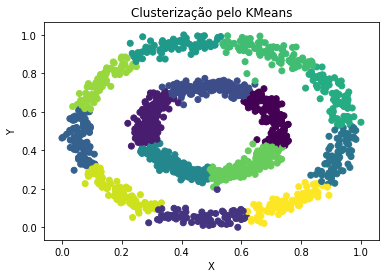

In [11]:
kmeans = KMeans(n_clusters=14).fit(df_norm)
plt.scatter(df_norm['X'], df_norm['Y'], c=kmeans.labels_)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusterização pelo KMeans')

A clusterização acima não parece fazer muito sentido.

### Clusterizando com DBScan

In [12]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)

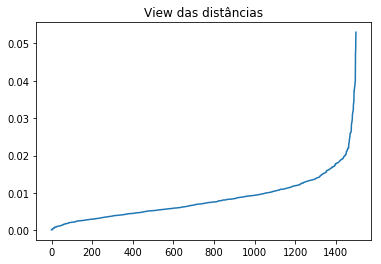

In [13]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.title('View das distâncias')
plt.show()

A análise do gráfico sugere a utilização de um epsilon de 0.04

In [21]:
# aux var para entender a qtd mínima de amostras
scores = []

# for para testar qtd ideal mínima de amostras
for i in tqdm(range(2,15)):
    db = DBSCAN(eps=0.04, min_samples=i).fit(df_norm)
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df_norm, db.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 19.52it/s]


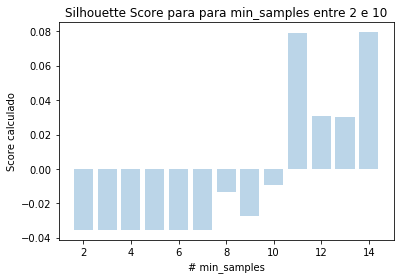

In [22]:
# Visualizando o Silhouette Score pela quantidade de amostras

plt.figure()
plt.bar(range(2,15), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para para min_samples entre 2 e 10')
plt.xlabel('# min_samples')
plt.ylabel('Score calculado')
plt.show()

Text(0.5, 1.0, 'Clusterização pelo DBScan')

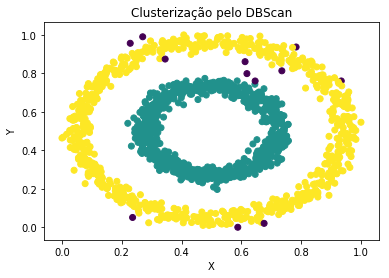

In [23]:
db = DBSCAN(eps=0.04, min_samples=11).fit(df_norm)
plt.scatter(df_norm['X'], df_norm['Y'], c=db.labels_)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusterização pelo DBScan')

## Respostas do Exercício

#### a) Qual a melhor quantidade de Clusters?

Como esperado, a melhor quantidade de *clusters* é **dois**, dado que segregam melhor os grupos de dados.

#### b) Qual a melhor técnica (k-means ou DBScan) a ser utilizada nesta clusterização?

Claramente, a clusterização via DBScan é melhor para esta situação. Por ser baseada em densidade, o método conseguiu identificar melhor os dois *clusters* no conjunto de dados. O K-Means, por sua vez, não conseguiu segregar os dados corretamente. 